In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('try23.csv')
df

Date      Time  Minutes  PA Home PPM  Outdoor PPM  \
0      1/3/2023   0:00:00        0          789          389   
1      1/3/2023   0:15:00       15          744          394   
2      1/3/2023   0:30:00       30          711          394   
3      1/3/2023   0:45:00       45          680          403   
4      1/3/2023   1:00:00       60          669          398   
...         ...       ...      ...          ...          ...   
10303  3/7/2023  14:45:00      885          520          416   
10304  3/7/2023  15:00:00      900          584          410   
10305  3/7/2023  15:15:00      915          634          410   
10306  3/7/2023  15:30:00      930          605          434   
10307  3/7/2023  15:45:00      945          611          429   

       PPM diff(in-out) Occupancy status Window status  PA Home temprature  \
0                   400              YES        CLOSED                30.0   
1                   350              YES        CLOSED                29.9   
2                   317              YES        CLOSED                29.9   
3                   277              YES        CLOSED                29.9   
4                   271              YES        CLOSED                29.8   
...                 ...              ...           ...                 ...   
10303               104               NO          OPEN                30.2   
10304               174              YES        CLOSED                30.1   
10305               224              YES        CLOSED                28.4   
10306               171              YES        CLOSED                26.6   
10307               182              YES        CLOSED                28.6   

       Outdoor Temp  ...  DBT based cluster RH based cluster  \
0              25.3  ...                  0                0   
1              25.3  ...                  0                0   
2              25.2  ...                  0                0   
3              25.1  ...                  0                0   
4              24.9  ...                  0                0   
...             ...  ...                ...              ...   
10303          33.6  ...                  2                2   
10304          31.0  ...                  2                2   
10305          30.1  ...                  2                0   
10306          29.9  ...                  2                0   
10307          29.8  ...                  2                0   

      DPT based cluster AH based cluster  PA Home RH  PA Home DPT  PA Home AH  \
0                     0                0        64.2         22.5        19.5   
1                     0                0        64.2         22.4        19.4   
2                     0                0        64.2         22.4        19.4   
3                     0                0        64.0         22.3        19.3   
4                     0                0        64.1         22.3        19.2   
...                 ...              ...         ...          ...         ...   
10303                 0                0        83.6         27.1        25.6   
10304                 0                0        84.0         27.1        25.7   
10305                 2                2        72.3         23.0        20.1   
10306                 2                2        65.4         19.5        16.4   
10307                 2                2        72.3         23.1        20.3   

       Outdoor RH   Outdoor DPT  Outdoor AH  
0            77.7          21.2        18.2  
1            77.7          21.2        18.2  
2            77.4          21.0        18.1  
3            77.4          20.9        17.9  
4            78.5          20.9        18.0  
...           ...           ...         ...  
10303        71.0          27.6        26.1  
10304        75.3          26.1        24.1  
10305        76.1          25.4        23.2  
10306        77.2          25.4        23.3  
10307        79.1          25.8        23.7  

[10308 row

In [14]:
df.keys()

Index(['Date', 'Time', 'Minutes', 'PA Home PPM', 'Outdoor PPM',
       'PPM diff(in-out)', 'Occupancy status', 'Window status',
       'PA Home temprature', 'Outdoor Temp', 'Temp diff(in-out)', 'AC status',
       'Wastage Scenario infiltration', 'Wastage Scenario no occupancy',
       'CO2 based cluster', 'DBT based cluster', 'RH based cluster',
       'DPT based cluster', 'AH based cluster', 'PA Home RH', 'PA Home DPT',
       'PA Home AH', 'Outdoor RH', ' Outdoor DPT', 'Outdoor AH'],
      dtype='object')

In [15]:
df_new=df[['PA Home PPM','PA Home temprature','PA Home RH','PA Home DPT','PA Home AH',
      'Outdoor PPM','Outdoor Temp','Outdoor RH', ' Outdoor DPT', 'Outdoor AH','AC status','Window status']]
df_new

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

      AC status Window status  
0           OFF        CLOSED  
1           OFF        CLOSED  
2           OFF        CLOSED  
3           OFF        CLOSED  
4           OFF        CLOSED  
...         ...           ...  
10303        ON          OPEN  
10304       OFF        CLOSED  
10305       OFF        CLOSED  
10306        ON        CLOSED  
10307       OFF        CLOSED  

[10308 rows x 12 columns]

In [16]:
df_new['AC status']=df_new['AC status'].map({'ON':1,'OFF':0})
df_new

C:\Users\good day\AppData\Local\Temp\ipykernel_19160\2058001727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['AC status']=df_new['AC status'].map({'ON':1,'OFF':0})


PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

       AC status Window status  
0              0        CLOSED  
1              0        CLOSED  
2              0        CLOSED  
3              0        CLOSED  
4              0        CLOSED  
...          ...           ...  
10303          1          OPEN  
10304          0        CLOSED  
10305          0        CLOSED  
10306          1        CLOSED  
10307          0        CLOSED  

[10308 rows x 12 columns]

In [17]:
X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['CLOSED', 'CLOSED', 'CLOSED', ..., 'CLOSED', 'CLOSED', 'CLOSED'],
      dtype=object)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred,pos_label='CLOSED')
recall = recall_score(y_test, y_pred,pos_label='CLOSED')
f1 = f1_score(y_test, y_pred,pos_label='CLOSED')
print('accuracy',accuracy)
print("Precision (CLOSED):", precision)
print("Recall (CLOSED):", recall)
print("F1-Score (CLOSED):", f1)

accuracy 0.9938271604938271
Precision (CLOSED): 0.9932334461092315
Recall (CLOSED): 0.9966052376333656
F1-Score (CLOSED): 0.9949164851125635


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred,pos_label='OPEN')
recall = recall_score(y_test, y_pred,pos_label='OPEN')
f1 = f1_score(y_test, y_pred,pos_label='OPEN')
print('accuracy',accuracy)
print("Precision (OPEN):", precision)
print("Recall (OPEN):", recall)
print("F1-Score (OPEN):", f1)

accuracy 0.9938271604938271
Precision (OPEN): 0.994748687171793
Recall (OPEN): 0.9895522388059701
F1-Score (OPEN): 0.9921436588103254


In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(160,60))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=df_new['Window status'],fontsize=30)
plt.show()

In [10]:
df_ac=df[['PA Home PPM','PA Home temprature','PA Home RH','PA Home DPT','PA Home AH',
      'Outdoor PPM','Outdoor Temp','Outdoor RH', ' Outdoor DPT', 'Outdoor AH','AC status',]]
df_ac

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

      AC status  
0           OFF  
1           OFF  
2           OFF  
3           OFF  
4           OFF  
...         ...  
10303        ON  
10304       OFF  
10305       OFF  
10306        ON  
10307       OFF  

[10308 rows x 11 columns]

In [11]:
X=df_ac.iloc[:,:-1]
y=df_ac.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['OFF', 'ON', 'OFF', ..., 'OFF', 'OFF', 'ON'], dtype=object)

In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
# from sklearn.metrics import precision_score, recall_score, f1_score
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
print('accuracy',accuracy)
# print("Precision (OPEN):", precision)
# print("Recall (OPEN):", recall)
# print("F1-Score (OPEN):", f1)


accuracy 0.9268077601410935


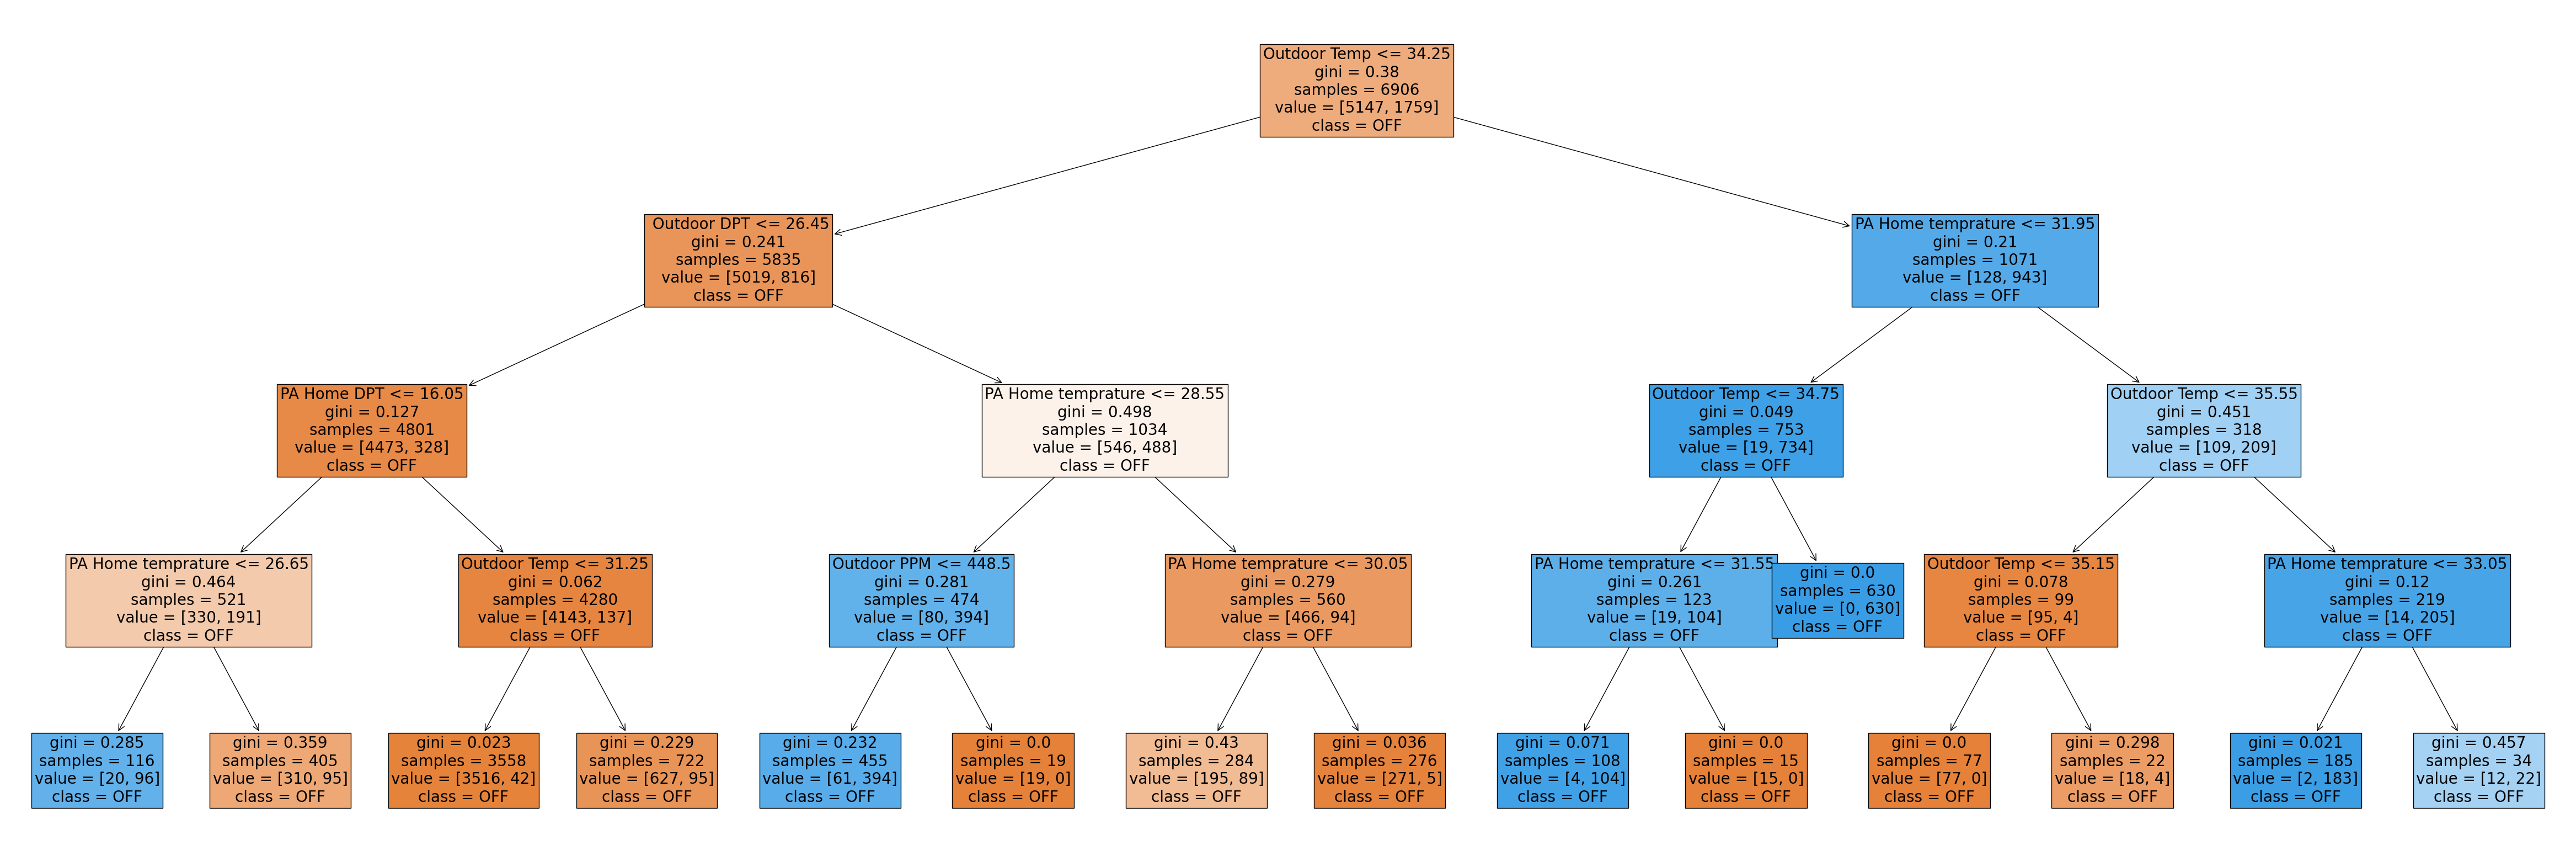

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=df_ac['AC status'],fontsize=20)
plt.show()

In [89]:
df_new=df[['PA Home PPM','PA Home temprature','PA Home RH','PA Home DPT','PA Home AH',
      'Outdoor PPM','Outdoor Temp','Outdoor RH', ' Outdoor DPT', 'Outdoor AH','AC status','Window status']]
df_new

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

      AC status Window status  
0           OFF        CLOSED  
1           OFF        CLOSED  
2           OFF        CLOSED  
3           OFF        CLOSED  
4           OFF        CLOSED  
...         ...           ...  
10303        ON          OPEN  
10304       OFF        CLOSED  
10305       OFF        CLOSED  
10306        ON        CLOSED  
10307       OFF        CLOSED  

[10308 rows x 12 columns]

In [90]:
df_new['Window status']=df_new['Window status'].map({'CLOSED':1,'OPEN':0})
df_new['AC status']=df_new['AC status'].map({'ON':1,'OFF':0})
df_new

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

       AC status  Window status  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  
...          ...            ...  
10303          1              0  
10304          0              1  
10305          0              1  
10306          1              1  
10307          0              1  

[10308 rows x 12 columns]

In [82]:
X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [76]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [79]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','none'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40],'max_iter':[100,200,300,400],}
clf_regressor=GridSearchCV(clf,param_grid=parameter,scoring='accuracy',cv=5)
clf_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [80]:
print(clf_regressor.best_params_)

{'C': 10, 'max_iter': 400, 'penalty': 'l2'}


In [81]:
print(clf_regressor.best_score_)

0.9979726932915284


In [77]:
df_new=df[['PA Home PPM','PA Home temprature','PA Home RH','PA Home DPT','PA Home AH',
      'Outdoor PPM','Outdoor Temp','Outdoor RH', ' Outdoor DPT', 'Outdoor AH','AC status','Window status']]
df_new

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

      AC status Window status  
0           OFF        CLOSED  
1           OFF        CLOSED  
2           OFF        CLOSED  
3           OFF        CLOSED  
4           OFF        CLOSED  
...         ...           ...  
10303        ON          OPEN  
10304       OFF        CLOSED  
10305       OFF        CLOSED  
10306        ON        CLOSED  
10307       OFF        CLOSED  

[10308 rows x 12 columns]

In [78]:
df_new['Window status']=df_new['Window status'].map({'CLOSED':1,'OPEN':0})
df_new['AC status']=df_new['AC status'].map({'ON':1,'OFF':0})
df_new

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

       AC status  Window status  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  
...          ...            ...  
10303          1              0  
10304          0              1  
10305          0              1  
10306          1              1  
10307          0              1  

[10308 rows x 12 columns]

In [101]:
X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [103]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=10, max_iter=300)
clf.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=300)

In [109]:
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] 

Accuracy: 0.9988
Precision: 0.9995
Recall: 0.9985
F1-Score: 0.9990
Log-Loss: 0.0030
Cohen's Kappa: 0.9975
Matthews Correlation Coefficient: 0.9976
Balanced Accuracy: 0.9989


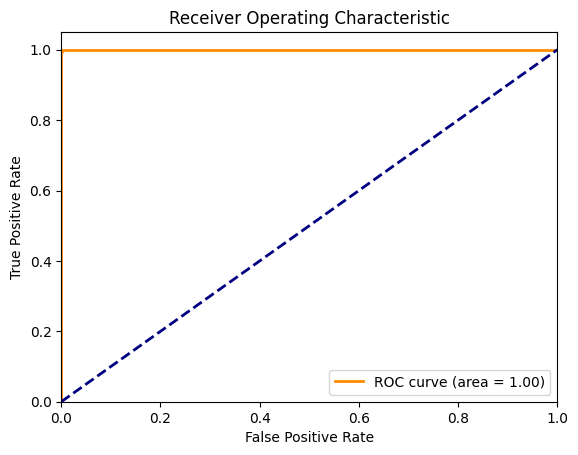

Confusion Matrix:
[[1357    1]
 [   3 2041]]


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_curve, auc, confusion_matrix, log_loss, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log-Loss: {logloss:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


In [91]:
df_new.head()

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0          789                30.0        64.2         22.5        19.5   
1          744                29.9        64.2         22.4        19.4   
2          711                29.9        64.2         22.4        19.4   
3          680                29.9        64.0         22.3        19.3   
4          669                29.8        64.1         22.3        19.2   

   Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  AC status  \
0          389          25.3        77.7          21.2        18.2          0   
1          394          25.3        77.7          21.2        18.2          0   
2          394          25.2        77.4          21.0        18.1          0   
3          403          25.1        77.4          20.9        17.9          0   
4          398          24.9        78.5          20.9        18.0          0   

   Window status  
0              1  
1              1  
2              1  
3              1  
4              1

In [92]:
df_new.corr()

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  \
PA Home PPM            1.000000           -0.275834   -0.156628    -0.283102   
PA Home temprature    -0.275834            1.000000   -0.148740     0.395988   
PA Home RH            -0.156628           -0.148740    1.000000     0.842840   
PA Home DPT           -0.283102            0.395988    0.842840     1.000000   
PA Home AH            -0.277497            0.374042    0.856716     0.992323   
Outdoor PPM            0.494933           -0.204007    0.082006    -0.032486   
Outdoor Temp          -0.032148            0.363195   -0.334385    -0.126383   
Outdoor RH             0.234152           -0.470731    0.647254     0.357627   
 Outdoor DPT           0.221503           -0.202194    0.442193     0.314619   
Outdoor AH             0.223275           -0.213725    0.436486     0.298029   
AC status              0.049602           -0.166456   -0.234953    -0.310930   
Window status          0.660684           -0.234191   -0.129020    -0.237504   

                    PA Home AH  Outdoor PPM  Outdoor Temp  Outdoor RH  \
PA Home PPM          -0.277497     0.494933     -0.032148    0.234152   
PA Home temprature    0.374042    -0.204007      0.363195   -0.470731   
PA Home RH            0.856716     0.082006     -0.334385    0.647254   
PA Home DPT           0.992323    -0.032486     -0.126383    0.357627   
PA Home AH            1.000000    -0.013405     -0.110502    0.383270   
Outdoor PPM          -0.013405     1.000000     -0.010067    0.368521   
Outdoor Temp         -0.110502    -0.010067      1.000000   -0.543073   
Outdoor RH            0.383270     0.368521     -0.543073    1.000000   
 Outdoor DPT          0.352923     0.387245      0.237990    0.667811   
Outdoor AH            0.340404     0.389281      0.228957    0.677508   
AC status            -0.290116     0.097973      0.633418   -0.223142   
Window status        -0.235413     0.336138     -0.028761    0.173010   

                     Outdoor DPT  Outdoor AH  AC status  Window status  
PA Home PPM             0.221503    0.223275   0.049602       0.660684  
PA Home temprature     -0.202194   -0.213725  -0.166456      -0.234191  
PA Home RH              0.442193    0.436486  -0.234953      -0.129020  
PA Home DPT             0.314619    0.298029  -0.310930      -0.237504  
PA Home AH              0.352923    0.340404  -0.290116      -0.235413  
Outdoor PPM             0.387245    0.389281   0.097973       0.336138  
Outdoor Temp            0.237990    0.228957   0.633418      -0.028761  
Outdoor RH              0.667811    0.677508  -0.223142       0.173010  
 Outdoor DPT            1.000000    0.993000   0.275373       0.150716  
Outdoor AH              0.993000    1.000000   0.275751       0.152713  
AC status               0.275373    0.275751   1.000000       0.125904  
Window status           0.150716    0.152713   0.125904       1.000000

<Axes: >

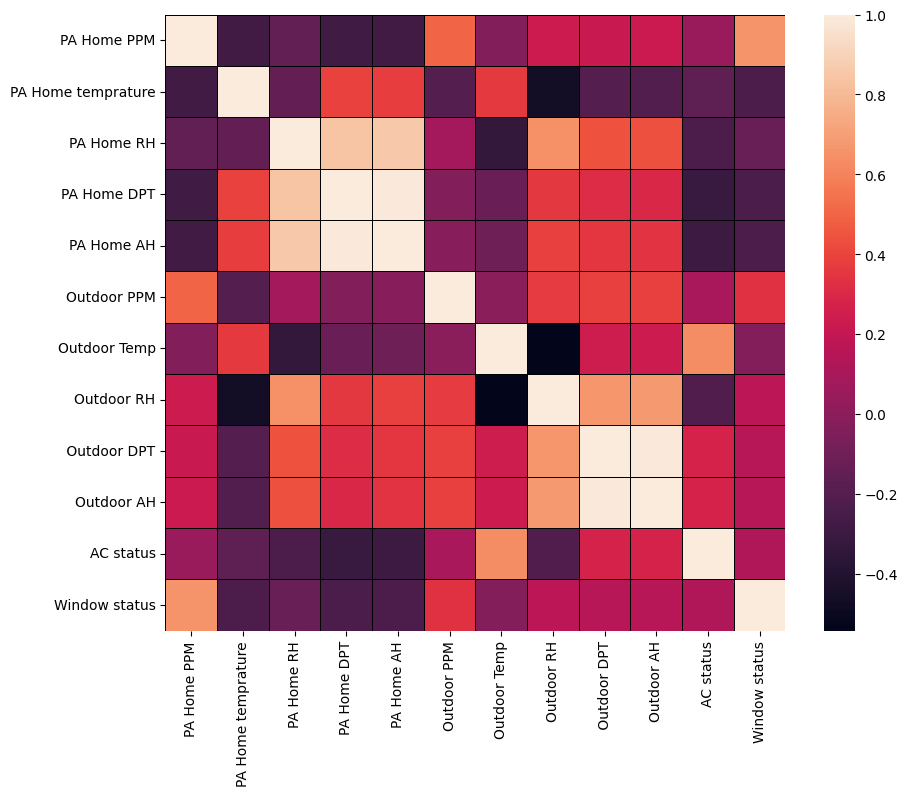

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=False, linecolor='black',linewidths=0.5)

In [85]:
import pandas as pd
from scipy.stats import chi2_contingency

In [86]:
df.keys()

Index(['Date', 'Time', 'Minutes', 'PA Home PPM', 'Outdoor PPM',
       'PPM diff(in-out)', 'Occupancy status', 'Window status',
       'PA Home temprature', 'Outdoor Temp', 'Temp diff(in-out)', 'AC status',
       'Wastage Scenario infiltration', 'Wastage Scenario no occupancy',
       'CO2 based cluster', 'DBT based cluster', 'RH based cluster',
       'DPT based cluster', 'AH based cluster', 'PA Home RH', 'PA Home DPT',
       'PA Home AH', 'Outdoor RH', ' Outdoor DPT', 'Outdoor AH'],
      dtype='object')

In [87]:
df_st=df[['PA Home PPM','PA Home temprature','PA Home RH','PA Home DPT','PA Home AH',
      'Outdoor PPM','Outdoor Temp','Outdoor RH', ' Outdoor DPT', 'Outdoor AH','AC status','Window status']]

In [88]:
df_st

PA Home PPM  PA Home temprature  PA Home RH  PA Home DPT  PA Home AH  \
0              789                30.0        64.2         22.5        19.5   
1              744                29.9        64.2         22.4        19.4   
2              711                29.9        64.2         22.4        19.4   
3              680                29.9        64.0         22.3        19.3   
4              669                29.8        64.1         22.3        19.2   
...            ...                 ...         ...          ...         ...   
10303          520                30.2        83.6         27.1        25.6   
10304          584                30.1        84.0         27.1        25.7   
10305          634                28.4        72.3         23.0        20.1   
10306          605                26.6        65.4         19.5        16.4   
10307          611                28.6        72.3         23.1        20.3   

       Outdoor PPM  Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  \
0              389          25.3        77.7          21.2        18.2   
1              394          25.3        77.7          21.2        18.2   
2              394          25.2        77.4          21.0        18.1   
3              403          25.1        77.4          20.9        17.9   
4              398          24.9        78.5          20.9        18.0   
...            ...           ...         ...           ...         ...   
10303          416          33.6        71.0          27.6        26.1   
10304          410          31.0        75.3          26.1        24.1   
10305          410          30.1        76.1          25.4        23.2   
10306          434          29.9        77.2          25.4        23.3   
10307          429          29.8        79.1          25.8        23.7   

      AC status Window status  
0           OFF        CLOSED  
1           OFF        CLOSED  
2           OFF        CLOSED  
3           OFF        CLOSED  
4           OFF        CLOSED  
...         ...           ...  
10303        ON          OPEN  
10304       OFF        CLOSED  
10305       OFF        CLOSED  
10306        ON        CLOSED  
10307       OFF        CLOSED  

[10308 rows x 12 columns]

In [89]:
contingency_table = pd.crosstab(df_st['AC status'], df_st['Window status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [90]:
print("Chi-Square Test of Independence results:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between AC status and Window status.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between AC status and Window status.")

Chi-Square Test of Independence results:
Chi-square statistic: 162.81185081469297
P-value: 2.7499523186094884e-37
Degrees of freedom: 1
Expected frequencies: [[4570.59623593 3111.40376407]
 [1562.40376407 1063.59623593]]
Reject the null hypothesis: There is a significant association between AC status and Window status.


Rejecting the null hypothesis "There is no significant association between AC status and Window status" means that the data and statistical analysis we have conducted have provided evidence that there is indeed a meaningful relationship between the AC (air conditioning) status and the window status.

In other words, you have found statistical evidence to support the idea that changes in the AC status (on or off) are associated with changes in the window status (open or closed) within your dataset. This rejection indicates that the observed relationship between these two variables is not likely due to random chance, and there's a reasonable basis to conclude that the relationship is real and meaningful.

Rejecting the null hypothesis is often considered a significant outcome in statistical analysis, as it suggests that the variables being studied are not independent of each other and that there might be a causal or influential relationship between them. However, it's important to consider the context, the data quality, and the assumptions of the statistical test before drawing strong conclusions based solely on the rejection of the null hypothesis.


In [129]:
from scipy.stats import ttest_ind

In [130]:
temp_closed = df_st[df_st['Window status'] == 'CLOSED']['Outdoor Temp']
temp_open = df_st[df_st['Window status'] == 'OPEN']['Outdoor Temp']

In [132]:
t_statistic, p_value = ttest_ind(temp_closed, temp_open)

In [134]:
print("Independent Samples t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Outdoor Temp between CLOSED and OPEN windows.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Outdoor Temp between CLOSED and OPEN windows.")

Independent Samples t-test results:
T-statistic: -2.920979803643425
P-value: 0.0034968931774419214
Reject the null hypothesis: There is a significant difference in Outdoor Temp between CLOSED and OPEN windows.


The results of the Independent Samples t-test reveal valuable insights regarding the relationship between window status (CLOSED and OPEN) and outdoor temperature.

The calculated T-statistic of -2.920979803643425 indicates the difference in outdoor temperature means between the CLOSED and OPEN window states. This T-statistic represents how much the means differ in terms of standard deviations. A negative T-statistic implies that the mean outdoor temperature is lower when the windows are OPEN compared to when they are CLOSED.

The corresponding P-value of 0.0034968931774419214 is a critical piece of information. A low P-value suggests that the observed difference in means is statistically significant and not likely to be the result of random chance. In this case, the P-value is below commonly accepted significance levels like 0.05, indicating strong evidence against the null hypothesis.

Therefore, with a P-value of 0.0034968931774419214, you can confidently reject the null hypothesis. This means there is a significant difference in outdoor temperature between the two window states, CLOSED and OPEN.

In simpler terms, the statistical analysis provides substantial evidence that when the windows are OPEN, the outdoor temperature tends to be significantly lower compared to when the windows are CLOSED. This finding suggests a meaningful relationship between window status and outdoor temperature, supporting the notion that window status has an impact on the external temperature within the building environment.







In [137]:
correlation_coefficient = df_st['Outdoor Temp'].corr(df_st['Outdoor RH'])

# Print the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    print("Positive correlation: As Outdoor Temp increases, Outdoor RH tends to increase.")
elif correlation_coefficient < 0:
    print("Negative correlation: As Outdoor Temp increases, Outdoor RH tends to decrease.")
else:
    print("No correlation: There is no significant linear relationship between Outdoor Temp and Outdoor RH.")

Pearson Correlation Coefficient: -0.5430728717928546
Negative correlation: As Outdoor Temp increases, Outdoor RH tends to decrease.


In [138]:
from scipy.stats import mannwhitneyu

In [139]:
temp_closed = df[df['Window status'] == 'CLOSED']['Outdoor Temp']
temp_open = df[df['Window status'] == 'OPEN']['Outdoor Temp']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(temp_closed, temp_open, alternative='two-sided')

# Print the results
print("Mann-Whitney U test results:")
print("Test statistic:", statistic)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Outdoor Temp between CLOSED and OPEN windows.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Outdoor Temp between CLOSED and OPEN windows.")

Mann-Whitney U test results:
Test statistic: 12339670.0
P-value: 0.0017985061946534057
Reject the null hypothesis: There is a significant difference in Outdoor Temp between CLOSED and OPEN windows.



The results of the Mann-Whitney U test reveal important insights about the comparison between the outdoor temperature under CLOSED and OPEN window conditions.

The calculated test statistic of 12339670.0 signifies the degree of difference in the outdoor temperature distribution between the CLOSED and OPEN window states. A higher test statistic indicates a larger disparity between the two groups.

The associated P-value of 0.0017985061946534057 holds substantial significance. A low P-value suggests that the observed difference in outdoor temperature distributions is unlikely to have occurred by random chance alone. In this case, the P-value is notably lower than common significance levels like 0.05, indicating strong evidence against the null hypothesis.

As a result, with a P-value of 0.0017985061946534057, it is reasonable to reject the null hypothesis. This signifies that there is a meaningful and significant difference in outdoor temperature between the CLOSED and OPEN window conditions.

In simpler terms, the statistical analysis provides compelling evidence that the outdoor temperature is significantly distinct when the windows are OPEN compared to when they are CLOSED. This finding underscores the notion that the status of the windows—whether they are open or closed—has a substantial impact on the external temperature within the building environment.

In [54]:
df2=pd.read_excel('try34.xlsx')

In [55]:
df2

Date      Time  Minutes  Exp chamber PPM  \
0      2023-01-03 00:00:00  00:00:00        0              431   
1      2023-01-03 00:00:00  00:15:00       15              432   
2      2023-01-03 00:00:00  00:30:00       30              429   
3      2023-01-03 00:00:00  00:45:00       45              433   
4      2023-01-03 00:00:00  01:00:00       60              435   
...                    ...       ...      ...              ...   
11929  2023-03-07 00:00:00  14:45:00      885              485   
11930  2023-03-07 00:00:00  15:00:00      900              462   
11931  2023-03-07 00:00:00  15:15:00      915              423   
11932  2023-03-07 00:00:00  15:30:00      930              459   
11933  2023-03-07 00:00:00  15:45:00      945              516   

       Exp chamber Temprature  Exp chamber pressure  Exp chamber RH  \
0                        28.3                  1011            65.8   
1                        28.3                  1011            66.2   
2                        28.3                  1011            66.2   
3                        28.3                  1010            66.2   
4                        28.2                  1010            66.5   
...                       ...                   ...             ...   
11929                    30.5                   995            65.7   
11930                    30.4                   995            67.8   
11931                    30.5                   994            70.9   
11932                    30.5                   994            67.6   
11933                    30.4                   994            62.0   

       Exp chamber DPT  Exp chamber AH               Date.1    Time.1  \
0                 21.3            18.2  2023-01-03 00:00:00  00:00:00   
1                 21.4            18.3  2023-01-03 00:00:00  00:15:00   
2                 21.4            18.3  2023-01-03 00:00:00  00:30:00   
3                 21.4            18.3  2023-01-03 00:00:00  00:45:00   
4                 21.4            18.3  2023-01-03 00:00:00  01:00:00   
...                ...             ...                  ...       ...   
11929             23.3            20.5  2023-03-07 00:00:00  14:45:00   
11930             23.8            21.0  2023-03-07 00:00:00  15:00:00   
11931             24.7            22.2  2023-03-07 00:00:00  15:15:00   
11932             23.8            21.1  2023-03-07 00:00:00  15:30:00   
11933             22.3            19.2  2023-03-07 00:00:00  15:45:00   

       Minutes.1  Outdoor PPM  Outdoor Temp  Outdoor Pressure(mbar)  \
0              0          389          25.3                    1011   
1             15          394          25.3                    1011   
2             30          394          25.2                    1010   
3             45          403          25.1                    1010   
4             60          398          24.9                    1010   
...          ...          ...           ...                     ...   
11929        885          416          33.6                     995   
11930        900          410          31.0                     995   
11931        915          410          30.1                     995   
11932        930          434          29.9                     994   
11933        945          429          29.8                     994   

       Outdoor RH   Outdoor DPT  Outdoor AH AC status window status  
0            77.7          21.2        18.2       OFF          OPEN  
1            77.7          21.2        18.2       OFF          OPEN  
2            77.4          21.0        18.1       OFF          OPEN  
3            77.4          20.9        17.9       OFF          OPEN  
4            78.5          20.9        18.0       OFF          OPEN  
...           ...           ...         ...       ...           ...  
11929        71.0          27.6        26.1        ON          OPEN  
11930        75.3          26.1        24.1       OFF          OPEN  
11931        76.

In [56]:
df2.keys()

Index(['Date', 'Time', 'Minutes', 'Exp chamber PPM', 'Exp chamber Temprature',
       'Exp chamber pressure', 'Exp chamber RH', 'Exp chamber DPT',
       'Exp chamber AH', 'Date.1', 'Time.1', 'Minutes.1', 'Outdoor PPM',
       'Outdoor Temp', 'Outdoor Pressure(mbar)', 'Outdoor RH', ' Outdoor DPT',
       'Outdoor AH', 'AC status', 'window status'],
      dtype='object')

In [57]:
df2=df2[['Exp chamber PPM', 'Exp chamber Temprature',
       'Exp chamber pressure', 'Exp chamber RH', 'Exp chamber DPT',
       'Exp chamber AH','Outdoor PPM',
       'Outdoor Temp', 'Outdoor RH', ' Outdoor DPT',
       'Outdoor AH', 'AC status', 'window status']]
df2

Exp chamber PPM  Exp chamber Temprature  Exp chamber pressure  \
0                  431                    28.3                  1011   
1                  432                    28.3                  1011   
2                  429                    28.3                  1011   
3                  433                    28.3                  1010   
4                  435                    28.2                  1010   
...                ...                     ...                   ...   
11929              485                    30.5                   995   
11930              462                    30.4                   995   
11931              423                    30.5                   994   
11932              459                    30.5                   994   
11933              516                    30.4                   994   

       Exp chamber RH  Exp chamber DPT  Exp chamber AH  Outdoor PPM  \
0                65.8             21.3            18.2          389   
1                66.2             21.4            18.3          394   
2                66.2             21.4            18.3          394   
3                66.2             21.4            18.3          403   
4                66.5             21.4            18.3          398   
...               ...              ...             ...          ...   
11929            65.7             23.3            20.5          416   
11930            67.8             23.8            21.0          410   
11931            70.9             24.7            22.2          410   
11932            67.6             23.8            21.1          434   
11933            62.0             22.3            19.2          429   

       Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH AC status  \
0              25.3        77.7          21.2        18.2       OFF   
1              25.3        77.7          21.2        18.2       OFF   
2              25.2        77.4          21.0        18.1       OFF   
3              25.1        77.4          20.9        17.9       OFF   
4              24.9        78.5          20.9        18.0       OFF   
...             ...         ...           ...         ...       ...   
11929          33.6        71.0          27.6        26.1        ON   
11930          31.0        75.3          26.1        24.1       OFF   
11931          30.1        76.1          25.4        23.2       OFF   
11932          29.9        77.2          25.4        23.3       OFF   
11933          29.8        79.1          25.8        23.7       OFF   

      window status  
0              OPEN  
1              OPEN  
2              OPEN  
3              OPEN  
4              OPEN  
...             ...  
11929          OPEN  
11930          OPEN  
11931          OPEN  
11932          OPEN  
11933          OPEN  

[11934 rows x 13 columns]

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['AC status']=le.fit_transform(df2['AC status'])
df2

Exp chamber PPM  Exp chamber Temprature  Exp chamber pressure  \
0                  431                    28.3                  1011   
1                  432                    28.3                  1011   
2                  429                    28.3                  1011   
3                  433                    28.3                  1010   
4                  435                    28.2                  1010   
...                ...                     ...                   ...   
11929              485                    30.5                   995   
11930              462                    30.4                   995   
11931              423                    30.5                   994   
11932              459                    30.5                   994   
11933              516                    30.4                   994   

       Exp chamber RH  Exp chamber DPT  Exp chamber AH  Outdoor PPM  \
0                65.8             21.3            18.2          389   
1                66.2             21.4            18.3          394   
2                66.2             21.4            18.3          394   
3                66.2             21.4            18.3          403   
4                66.5             21.4            18.3          398   
...               ...              ...             ...          ...   
11929            65.7             23.3            20.5          416   
11930            67.8             23.8            21.0          410   
11931            70.9             24.7            22.2          410   
11932            67.6             23.8            21.1          434   
11933            62.0             22.3            19.2          429   

       Outdoor Temp  Outdoor RH   Outdoor DPT  Outdoor AH  AC status  \
0              25.3        77.7          21.2        18.2          0   
1              25.3        77.7          21.2        18.2          0   
2              25.2        77.4          21.0        18.1          0   
3              25.1        77.4          20.9        17.9          0   
4              24.9        78.5          20.9        18.0          0   
...             ...         ...           ...         ...        ...   
11929          33.6        71.0          27.6        26.1          1   
11930          31.0        75.3          26.1        24.1          0   
11931          30.1        76.1          25.4        23.2          0   
11932          29.9        77.2          25.4        23.3          0   
11933          29.8        79.1          25.8        23.7          0   

      window status  
0              OPEN  
1              OPEN  
2              OPEN  
3              OPEN  
4              OPEN  
...             ...  
11929          OPEN  
11930          OPEN  
11931          OPEN  
11932          OPEN  
11933          OPEN  

[11934 rows x 13 columns]

In [59]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
y_test.shape

(3939,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','none'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40],'max_iter':[100,200,300,400],}
clf_regressor=GridSearchCV(clf,param_grid=parameter,scoring='accuracy',cv=5)
clf_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [61]:
print(clf_regressor.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l2'}


In [62]:
print(clf_regressor.best_score_)

0.9997498436522827


Accuracy: 0.9992
Precision: 0.9963
Recall: 0.9982
F1-Score: 0.9973
Log-Loss: 0.0018
Cohen's Kappa: 0.9968
Matthews Correlation Coefficient: 0.9968
Balanced Accuracy: 0.9988


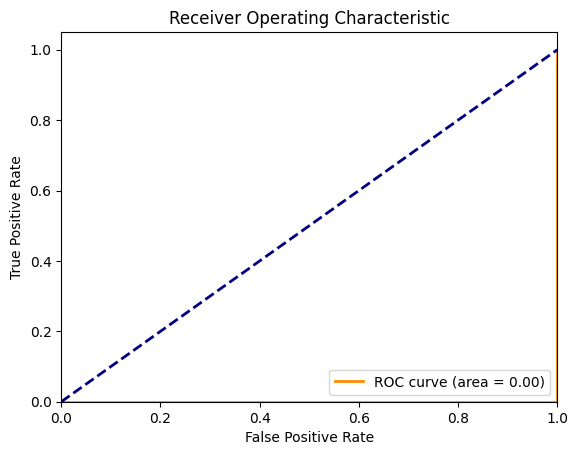

Confusion Matrix:
[[ 545    1]
 [   2 3391]]


In [74]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1, max_iter=200, penalty= 'l2')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, log_loss, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='CLOSED')
recall = recall_score(y_test, y_pred,pos_label='CLOSED')
f1 = f1_score(y_test, y_pred,pos_label='CLOSED')
logloss = log_loss(y_test, y_prob,)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log-Loss: {logloss:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob,pos_label='CLOSED')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9992
Precision: 0.9997
Recall: 0.9994
F1-Score: 0.9996
Log-Loss: 0.0018
Cohen's Kappa: 0.9968
Matthews Correlation Coefficient: 0.9968
Balanced Accuracy: 0.9988


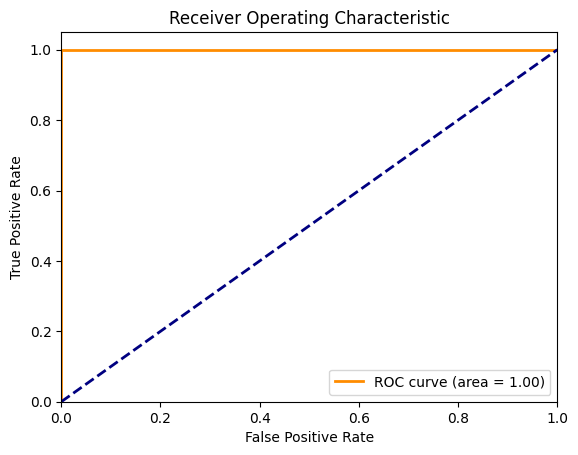

Confusion Matrix:
[[ 545    1]
 [   2 3391]]


In [75]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1, max_iter=200, penalty= 'l2')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, log_loss, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='OPEN')
recall = recall_score(y_test, y_pred,pos_label='OPEN')
f1 = f1_score(y_test, y_pred,pos_label='OPEN')
logloss = log_loss(y_test, y_prob,)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log-Loss: {logloss:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob,pos_label='OPEN')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
